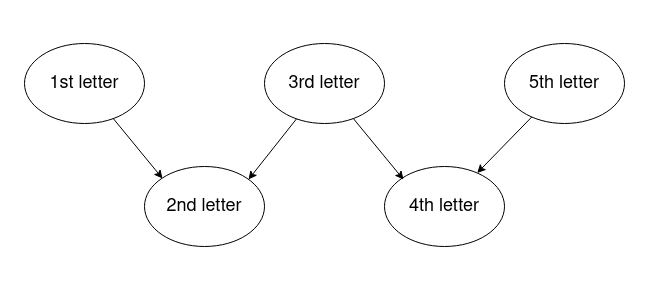

In [9]:
# LOL
# https://math.stackexchange.com/questions/4456302/bayesian-network-for-wordle

from IPython.display import Image
Image("BayesianNetwork1.png")

In [21]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [33]:
model = BayesianNetwork([("1st", "2nd"), ("3rd", "2nd"), ("3rd", "4th"), ("5th", "4th")])

In [30]:
import json
data = {}
with open("probabilities.json") as f:
   data = json.load(f)

print(data["A"])

[2955, 0.08243827591016878, 0.05844608732040731, 0.20170177151625052, 0.06988422374110755, 0.054958850606779186, 0.027200446366299345]


In [31]:
cpd_1_data = []
cpd_2_data = []
cpd_3_data = []
cpd_4_data = []
cpd_5_data = []

for key in data:
    cpd_1_data.append([data[key][2]])
    cpd_2_data.append([data[key][3]])
    cpd_3_data.append([data[key][4]])
    cpd_4_data.append([data[key][5]])
    cpd_5_data.append([data[key][6]])
    
cpd_1 = TabularCPD("1st", 26, cpd_1_data)
cpd_2 = TabularCPD("2nd", 26, cpd_2_data)
cpd_3 = TabularCPD("3rd", 26, cpd_3_data)
cpd_4 = TabularCPD("4th", 26, cpd_4_data)
cpd_5 = TabularCPD("5th", 26, cpd_5_data)

model.add_cpds(cpd_1, cpd_2, cpd_3, cpd_4, cpd_5)

model.get_cpds()

[<TabularCPD representing P(1st:26) at 0x7fed150e4940>,
 <TabularCPD representing P(2nd:26) at 0x7fed150e3fd0>,
 <TabularCPD representing P(3rd:26) at 0x7fed150e4760>,
 <TabularCPD representing P(4th:26) at 0x7fed150e4910>,
 <TabularCPD representing P(5th:26) at 0x7fed150e49a0>]

In [32]:
model.check_model()

ValueError: CPD associated with 2nd doesn't have proper parents associated with it.